# Problem Statement:
Generate the features from the dataset and use them to recommend the books according to the users

In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading data
books = pd.read_csv('Books.csv', encoding='latin1', on_bad_lines='skip')
users = pd.read_csv('Users.csv', encoding='latin1', on_bad_lines='skip')
ratings = pd.read_csv('Ratings.csv', encoding='latin1', on_bad_lines='skip')

C:\Users\vijay\AppData\Local\Temp\ipykernel_2828\3464715512.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv', encoding='latin1', on_bad_lines='skip')


In [3]:
# pd.set_option('display.max_rows', None)

# Data Exploration - Books

In [4]:
print(f'shape of books: {books.shape}')

shape of books: (271360, 8)


In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
books.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [7]:
books.sample(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
155950,0207148066,Hawke PM,John Hurst,1983,Angus &amp; Robertson Publishers,http://images.amazon.com/images/P/0207148066.0...,http://images.amazon.com/images/P/0207148066.0...,http://images.amazon.com/images/P/0207148066.0...
130189,0771056699,Switchbacks: True Stories from the Canadian Ro...,Sid Marty,2001,McClelland &amp; Stewart,http://images.amazon.com/images/P/0771056699.0...,http://images.amazon.com/images/P/0771056699.0...,http://images.amazon.com/images/P/0771056699.0...
158622,0679749322,In the Eye of the Sun (Vintage International),Ahdaf Soueif,1994,Random House Inc,http://images.amazon.com/images/P/0679749322.0...,http://images.amazon.com/images/P/0679749322.0...,http://images.amazon.com/images/P/0679749322.0...
226538,0764150979,Barron's Encyclopedia of Dog Breeds,D. Caroline Coile,1998,Barron's Educational Series,http://images.amazon.com/images/P/0764150979.0...,http://images.amazon.com/images/P/0764150979.0...,http://images.amazon.com/images/P/0764150979.0...
15464,0373242077,Family Kind Of Gal (That Special Woman!/Foreve...,Steve Jackson,1998,Silhouette,http://images.amazon.com/images/P/0373242077.0...,http://images.amazon.com/images/P/0373242077.0...,http://images.amazon.com/images/P/0373242077.0...


## Quick Data Check - Books

In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


## Statistical Summary - Books

In [9]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


# Data Exploration - Users

In [10]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [11]:
users.tail()

,User-ID,Location,Age
278669,278854,"portland, oregon, usa",NaN
278670,278855,"tacoma, washington, united kingdom",50.0
278671,278856,"brampton, ontario, canada",NaN
278672,278857,"knoxville, tennessee, usa",NaN
278673,278858,"dublin, n/a, ireland",NaN


In [12]:
users.sample(5)

,User-ID,Location,Age
97790,97863,"perry, new york, usa",17.0
21329,21350,"champaign, illinois, usa",23.0
68921,68975,"hartford, connecticut, usa",NaN
56098,56143,"warren, oregon, usa",NaN
158923,159040,"federal way, washington, usa",14.0


## Quick Data Check

In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278674 entries, 0 to 278673
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278674 non-null  int64  
 1   Location  278674 non-null  object 
 2   Age       167959 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


## Statistical Summary

In [14]:
users.describe()

,User-ID,Age
count,278674.000000,167959.000000
mean,139435.388160,34.755351
std,80499.376215,14.429790
min,1.000000,0.000000
25%,69722.250000,24.000000
50%,139433.500000,32.000000
75%,209151.750000,44.000000
max,278858.000000,244.000000


# Data Exploration - Ratings

In [15]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [16]:
ratings.tail()

,User-ID,ISBN,Book-Rating
1149775,276704,1563526298,9.0
1149776,276706,0679447156,0.0
1149777,276709,0515107662,10.0
1149778,276721,0590442449,10.0
1149779,276723,05162443314,8.0


In [17]:
ratings.sample(5)

,User-ID,ISBN,Book-Rating
43949,11601,0399148779,0.0
524145,127122,0515128546,5.0
1040647,248850,0061094757,0.0
429433,102647,0553279912,0.0
677034,164755,2070365360,8.0


## Quick Data Check - Ratings

In [18]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   User-ID      1149780 non-null  int64  
 1   ISBN         1149780 non-null  object 
 2   Book-Rating  1149772 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 26.3+ MB


## Statistical Summary - Ratings

In [19]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149772e+06
mean,1.403864e+05,2.866927e+00
std,8.056228e+04,3.854179e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [20]:
print(ratings.describe().round(3))

           User-ID  Book-Rating
count  1149780.000  1149772.000
mean    140386.395        2.867
std      80562.278        3.854
min          2.000        0.000
25%      70345.000        0.000
50%     141010.000        0.000
75%     211028.000        7.000
max     278854.000       10.000


# Data Preprocessing

## Identifying Duplicates

In [21]:
print(books.duplicated().sum())
print(users.duplicated().sum())
print(ratings.duplicated().sum())

0
0
0


- There are no duplicate values present in any of datasets.

## Identifying Missing Values

In [22]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [23]:
users.isna().sum()

User-ID          0
Location         0
Age         110715
dtype: int64

In [24]:
np.round(users.isna().sum()[2] / users.shape[0] * 100)

C:\Users\vijay\AppData\Local\Temp\ipykernel_2828\1620452839.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.round(users.isna().sum()[2] / users.shape[0] * 100)


40.0

In [25]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    8
dtype: int64

In [26]:
np.round((ratings.isna().sum()[2] / ratings.shape[0] * 100),4)

C:\Users\vijay\AppData\Local\Temp\ipykernel_2828\1684342947.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.round((ratings.isna().sum()[2] / ratings.shape[0] * 100),4)


0.0007

## Data Type Conversion

In [27]:
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce').fillna(0).astype(int)

In [28]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  int32 
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: int32(1), object(7)
memory usage: 15.5+ MB


# Data Visualization - Books

In [29]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


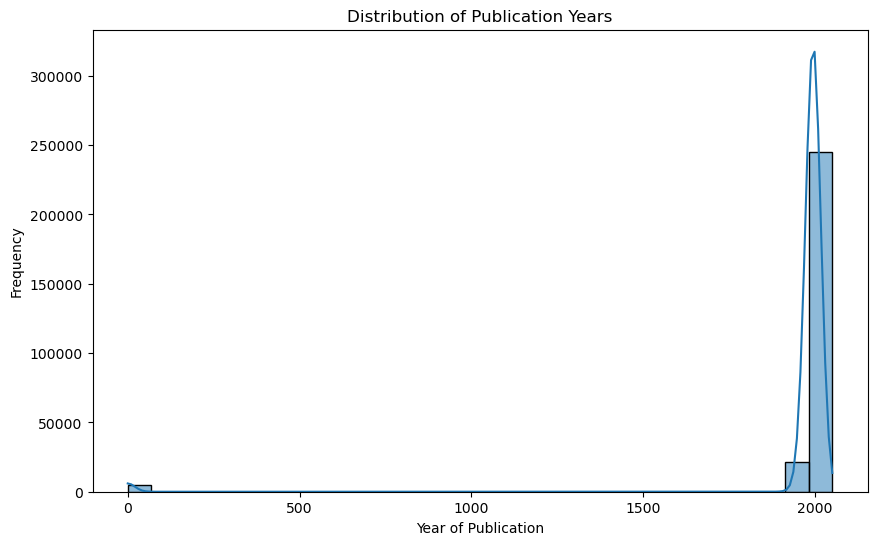

In [30]:
# Plot the distribution of publication years
plt.figure(figsize=(10, 6))
sns.histplot(books['Year-Of-Publication'], bins=30, kde=True)
plt.title('Distribution of Publication Years')
plt.xlabel('Year of Publication')
plt.ylabel('Frequency')
plt.show()

- The year with the most publications is 2000. There are more publications in 2000 than in all the other years combined.

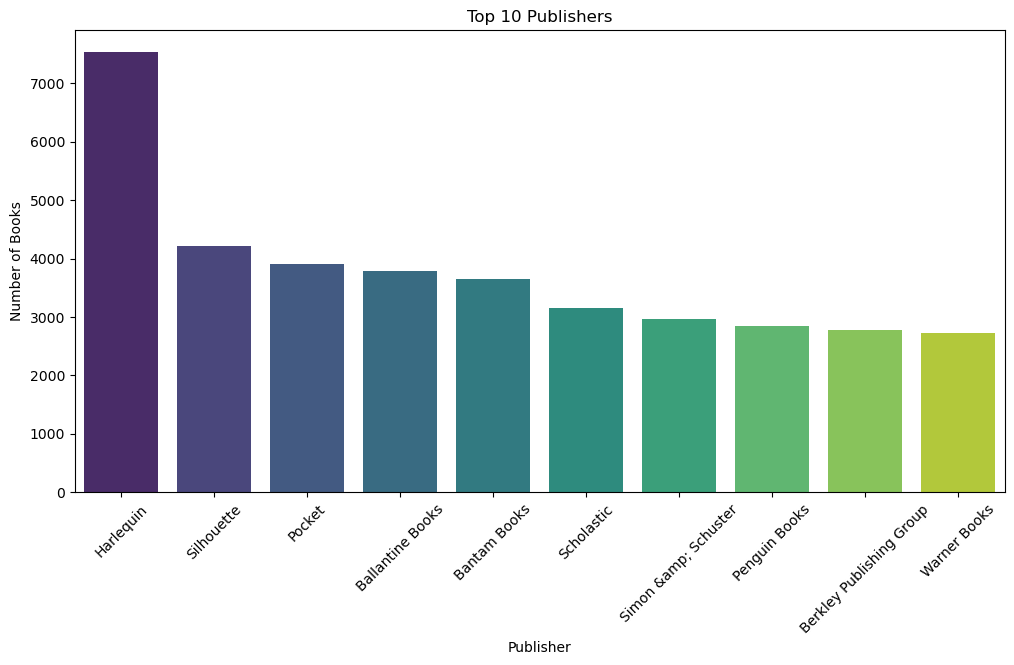

In [31]:
# Get the top 10 publishers
top_publishers = books['Publisher'].value_counts().head(10)

# Plot the top 10 publishers
plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='viridis')
plt.title('Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

- Harlequin published the most books out of the ten publishers listed. Silhouette and Pocket Books published the second and third most books, respectively.  Overall, the number of books published by each publisher increases as we move down the x-axis.

In [32]:
# Get the top 10 authors by the number of books
top_authors = books['Book-Author'].value_counts().head(10).index

# Filter the dataset for these authors
top_authors_books = books[books['Book-Author'].isin(top_authors)]

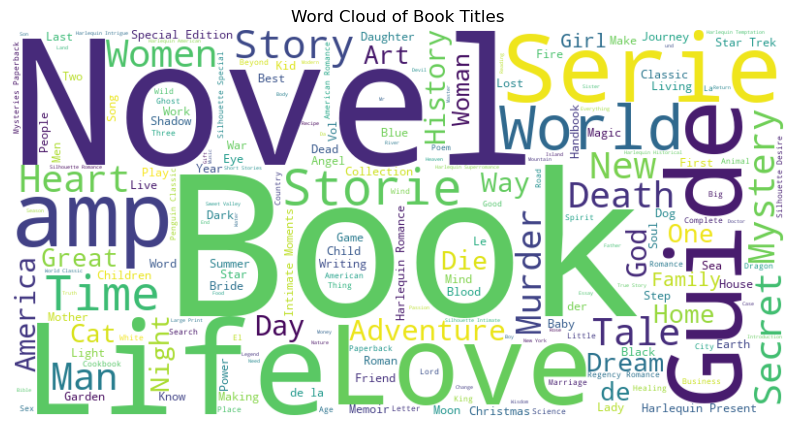

In [33]:
from wordcloud import WordCloud

# Combine all book titles into a single string
all_titles = ' '.join(books['Book-Title'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Book Titles')
plt.show()

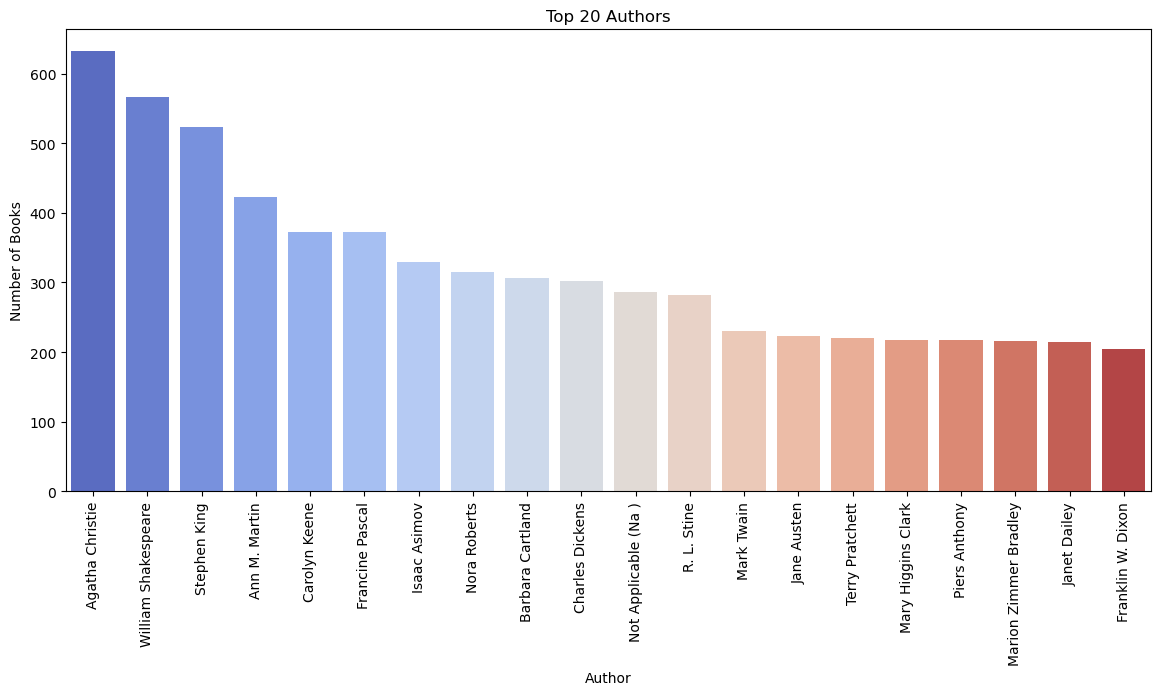

In [34]:
# Get the top 20 authors by the number of books
top_20_authors = books['Book-Author'].value_counts().head(20)

# Plot the top 20 authors
plt.figure(figsize=(14, 6))
sns.barplot(x=top_20_authors.index, y=top_20_authors.values, palette='coolwarm')
plt.title('Top 20 Authors')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=90)
plt.show()

- Agatha Christie sold the most books among the listed authors, followed by William Shakespeare and Stephen King.

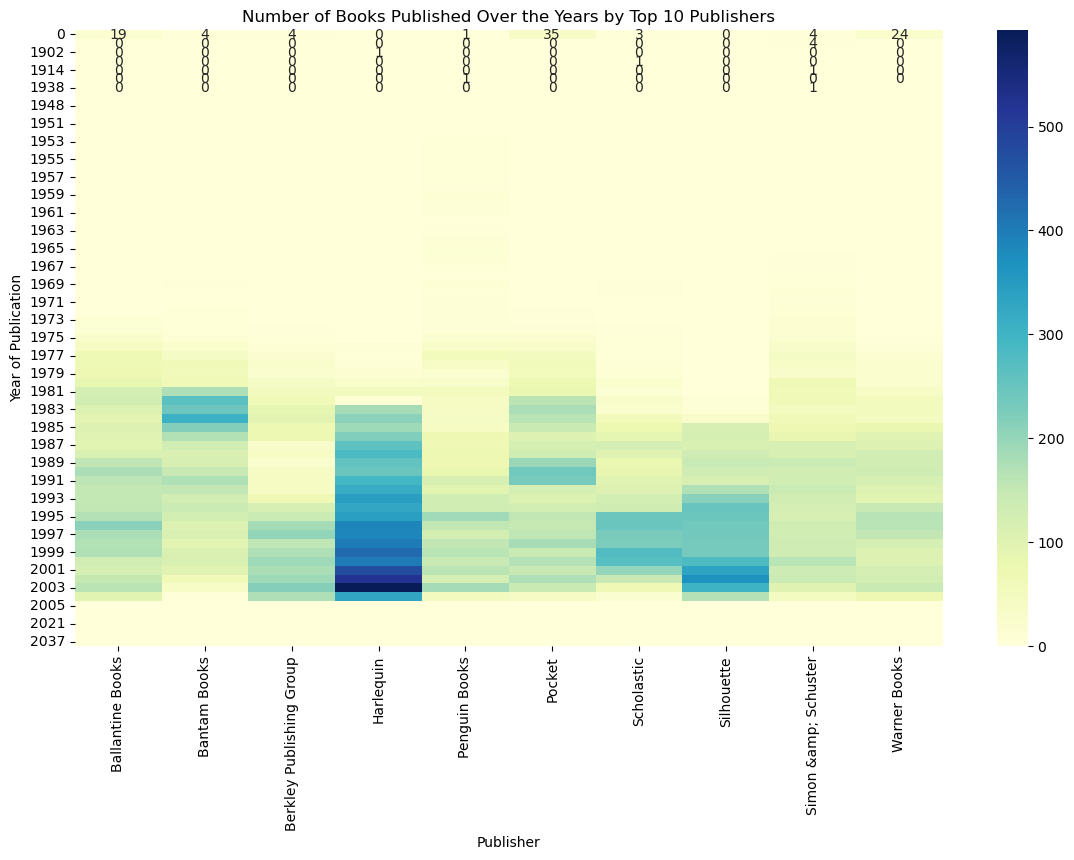

In [35]:
# Get the top 10 publishers
top_10_publishers = books['Publisher'].value_counts().head(10).index

# Filter the dataset for these publishers
top_publishers_books = books[books['Publisher'].isin(top_10_publishers)]

# Create a pivot table with years and publishers
pivot_table = top_publishers_books.pivot_table(index='Year-Of-Publication', columns='Publisher', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Number of Books Published Over the Years by Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Year of Publication')
plt.show()

# Data Visualization - Users

In [36]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [37]:
for i in users:
    users['Country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [38]:
users.Country.nunique()

572

In [39]:
users.head(2)

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa


In [40]:
users.isnull().sum()

User-ID          0
Location         0
Age         110715
Country        928
dtype: int64

In [41]:
users['Country']=users['Country'].astype('str')

In [42]:
a=list(users.Country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '6sjr3weden', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alcobal portugal', 'alderney', 'algeria', 'algì portugal', 'allen', 'almerl spain', 'ama lurra', 'america', 'american samoa', 'andalucl spain', 'andaucl spain', 'andorra', 'angola', 'antarctica', 'aotearoa', 'aragz ethiopia', 'aragz spain', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'barcelonì', 'barcelonì spain', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'bergued catalonia', 'bergued spain', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria'

C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


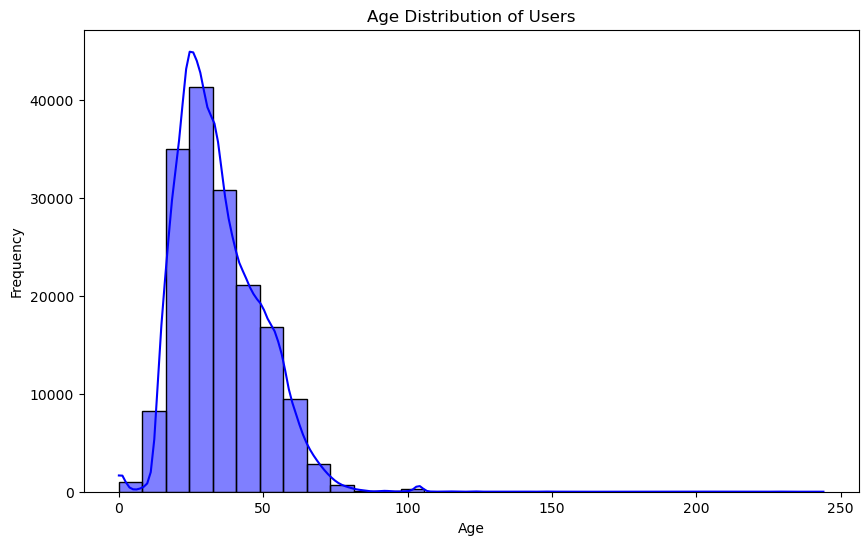

In [43]:
# Plot the distribution of user ages
plt.figure(figsize=(10, 6))
sns.histplot(users['Age'].dropna(), bins=30, kde=True, color='blue')
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

- The most frequent age group is between 0 and 50 years old.
- The frequency of users starts to decrease significantly after 50 years old.
- There are very few users over 100 years old.

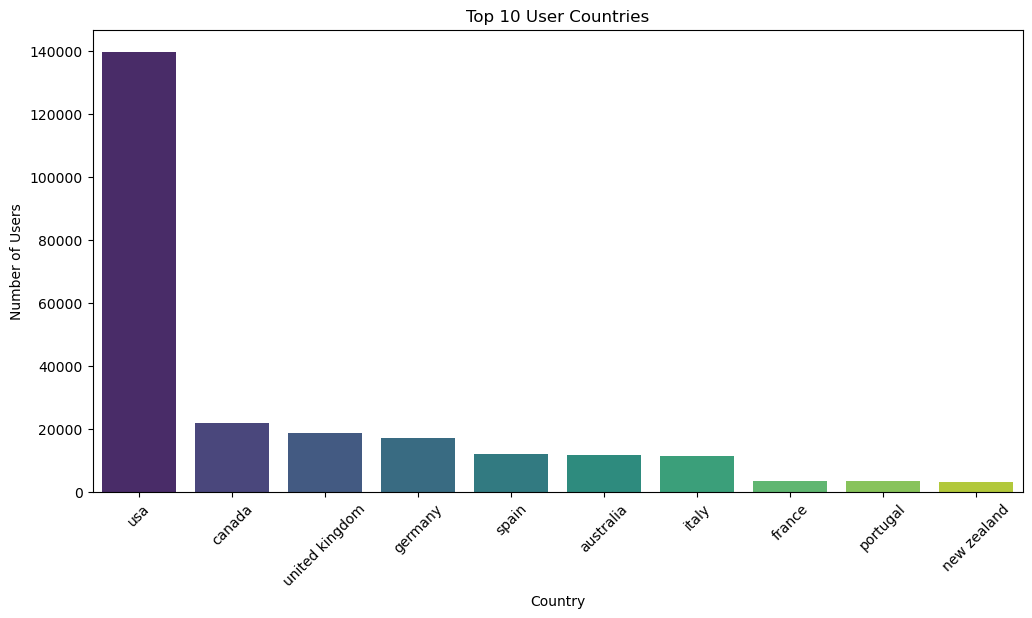

In [44]:
# Extracting the country information
users['Country'] = users['Location'].apply(lambda x: x.split(', ')[-1])

# Get the top 10 countries
top_countries = users['Country'].value_counts().head(10)

# Plot the top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 User Countries')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

- USA has the most users on the platform, followed by Canada and the United Kingdom.
- There is a significant drop in the number of users between USA and Canada.
- The number of users continues to decrease as we move down the x-axis.
- New Zealand has the fewest users among the top 10 countries.

In [45]:
# Filter the dataset to include only the top 10 countries
top_country_users = users[users['Country'].isin(top_countries.index)]

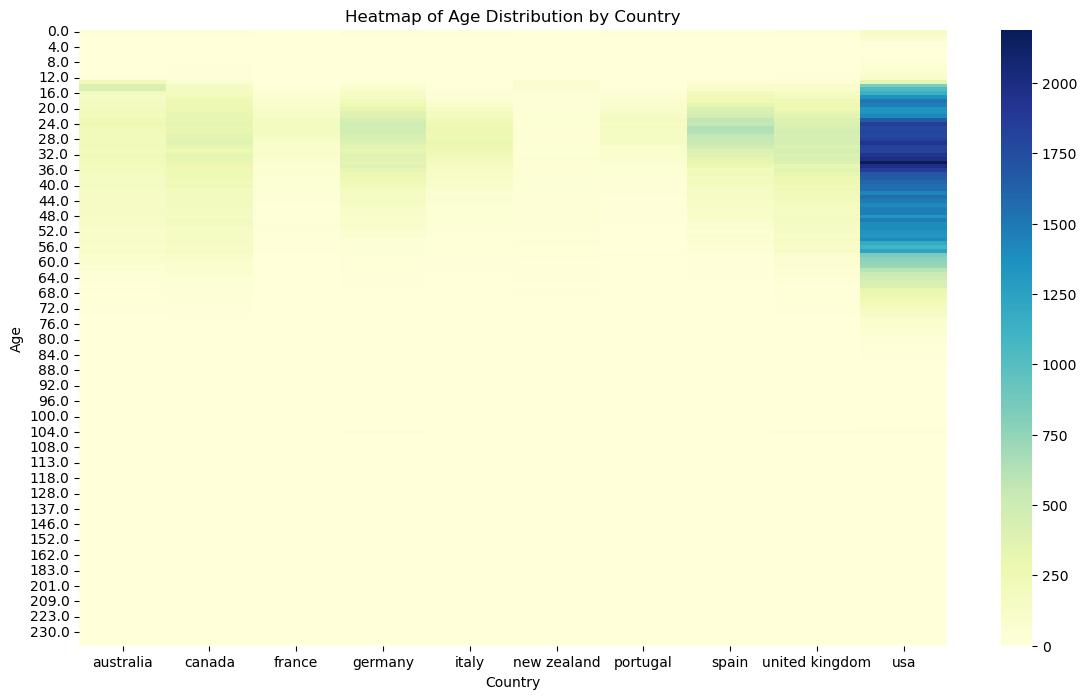

In [46]:
# Create a pivot table with age and country
age_country_pivot = top_country_users.pivot_table(index='Age', columns='Country', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(age_country_pivot, cmap='YlGnBu')
plt.title('Heatmap of Age Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Age')
plt.show()

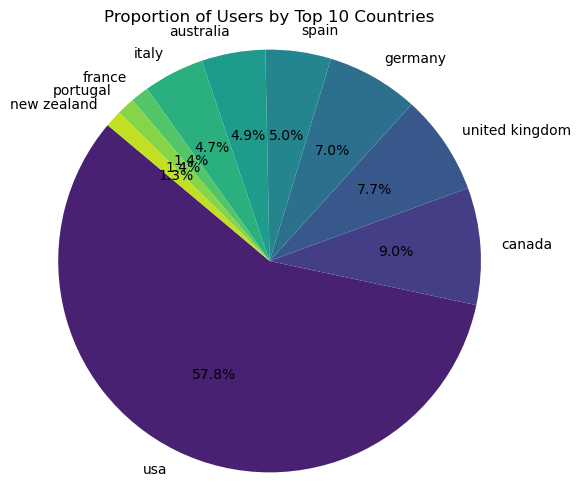

In [47]:
# Plot the pie chart of top countries
plt.figure(figsize=(6, 6))
plt.pie(top_countries.values, labels=top_countries.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_countries)))
plt.title('Proportion of Users by Top 10 Countries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

- The United States (USA) has the highest percentage of users (57.8%) among the top 10 countries.
- Canada is the second-highest with nearly 10% (9.0%).

C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


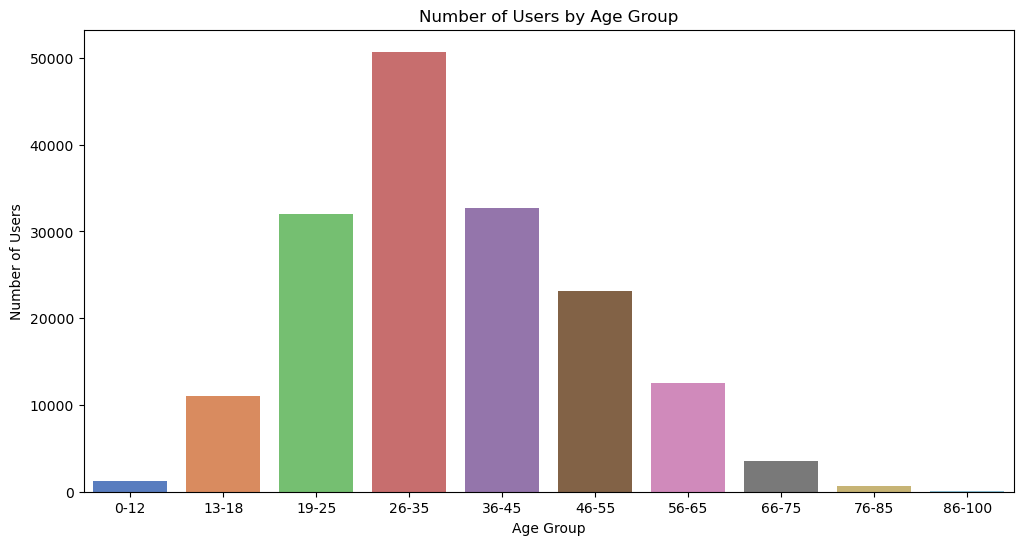

In [48]:
# Create age groups
age_bins = [0, 12, 18, 25, 35, 45, 55, 65, 75, 85, 100]
age_labels = ['0-12', '13-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-100']
users['Age Group'] = pd.cut(users['Age'], bins=age_bins, labels=age_labels, right=False)

# Plot the number of users by age group
plt.figure(figsize=(12, 6))
sns.countplot(x='Age Group', data=users, palette='muted')
plt.title('Number of Users by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.show()

- The age group with the most users is 26-35 years old. There are more users in this age group than in any other.
- The number of users gradually decreases as we move to older age groups. There are very few users over 75 years old.

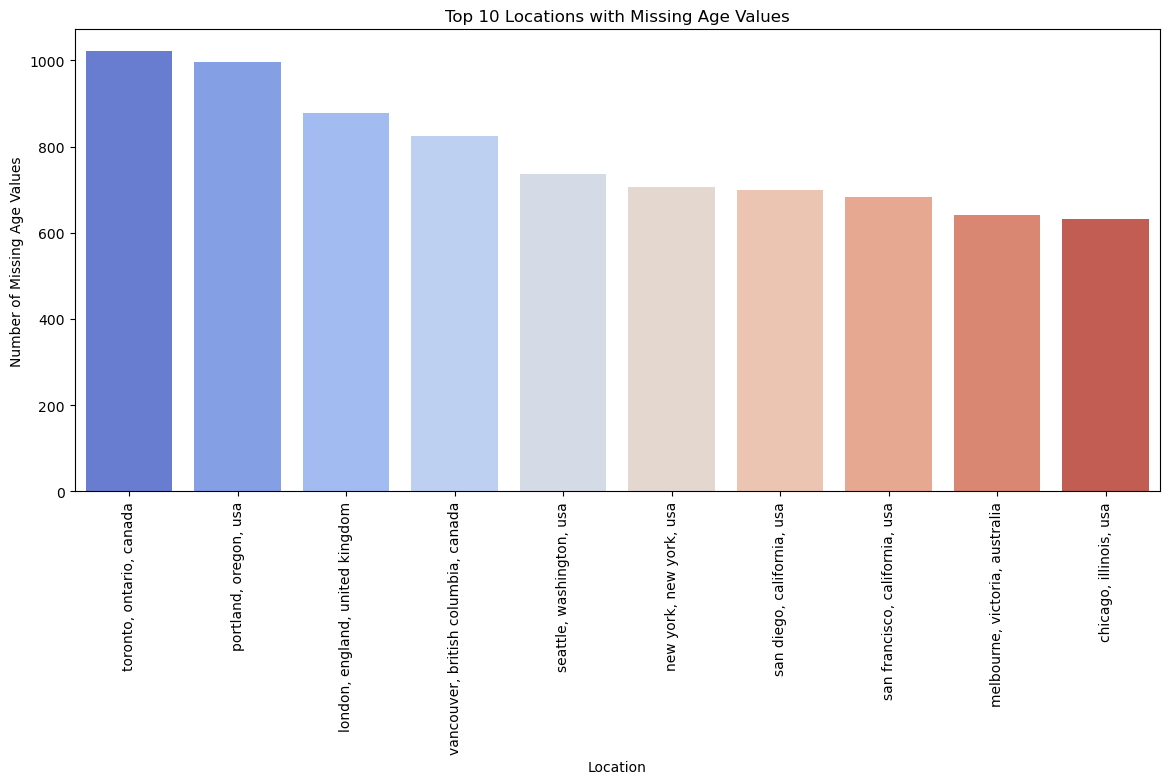

In [49]:
# Create a column indicating whether the age is missing
users['Age Missing'] = users['Age'].isnull()

# Get the top 10 locations with missing ages
top_missing_age_locations = users[users['Age Missing']]['Location'].value_counts().head(10)

# Plot the locations with missing ages
plt.figure(figsize=(14, 6))
sns.barplot(x=top_missing_age_locations.index, y=top_missing_age_locations.values, palette='coolwarm')
plt.title('Top 10 Locations with Missing Age Values')
plt.xlabel('Location')
plt.ylabel('Number of Missing Age Values')
plt.xticks(rotation=90)
plt.show()

C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


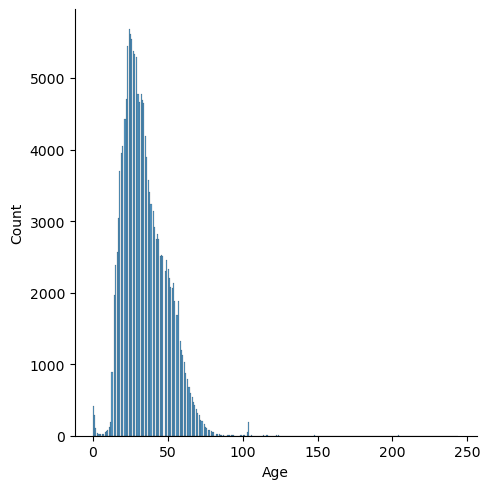

In [50]:
sns.displot(x='Age', data=users);

- Age values under 5 and over 100 are implausible for our book rating case, so we will replace them with NaN (Not a Number) values.

In [51]:
users.loc[(users.Age > 100) | (users.Age < 5), 'Age'] = np.nan

In [52]:
users.isna().sum()

User-ID             0
Location            0
Age            111962
Country             0
Age Group      111088
Age Missing         0
dtype: int64

C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


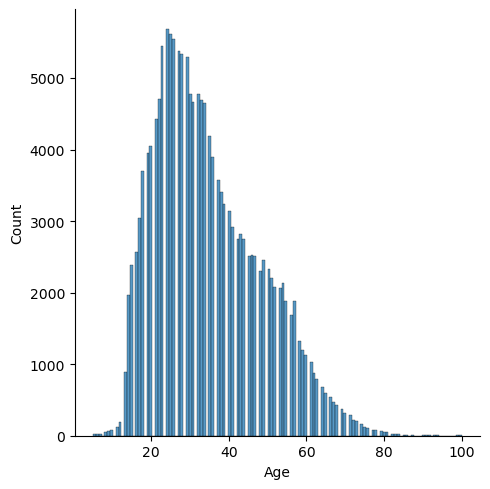

In [53]:
sns.displot(x='Age', data=users);

- Age has right-skewed distribution, so we'll use median to impute missing values, segmented by country to account for demographic differences.

In [54]:
users['Age'] = users['Age'].fillna(users.groupby('Country')['Age'].transform('median'))

In [55]:
users.isna().sum()

User-ID             0
Location            0
Age               635
Country             0
Age Group      111088
Age Missing         0
dtype: int64

In [56]:
users['Age'].fillna(users.Age.mean(),inplace=True)

In [57]:
users.isna().sum()

User-ID             0
Location            0
Age                 0
Country             0
Age Group      111088
Age Missing         0
dtype: int64

In [58]:
users.sample(50)

,User-ID,Location,Age,Country,Age Group,Age Missing
240608,240769,"elk creek, virginia, usa",36.0,usa,NaN,True
85084,85150,"chicago, illinois, usa",53.0,usa,46-55,False
109173,109254,"sandpoint, idaho, usa",36.0,usa,NaN,True
233714,233873,"williston, vermont, usa",36.0,usa,NaN,True
229056,229213,"salzburg, \n/a\"", austria""",41.5,"austria""",NaN,True
31705,31726,"deer park, new york, usa",36.0,usa,NaN,True
9095,9104,"monticello, minnesota, usa",36.0,usa,NaN,True
270814,270997,"winnipeg, marche, canada",50.0,canada,46-55,False
86042,86108,"salem, new hampshire, usa",9.0,usa,0-12,False
89008,89077,"aurora, colorado, usa",34.0,usa,26-35,False


# Data Visualization - Ratings

In [59]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


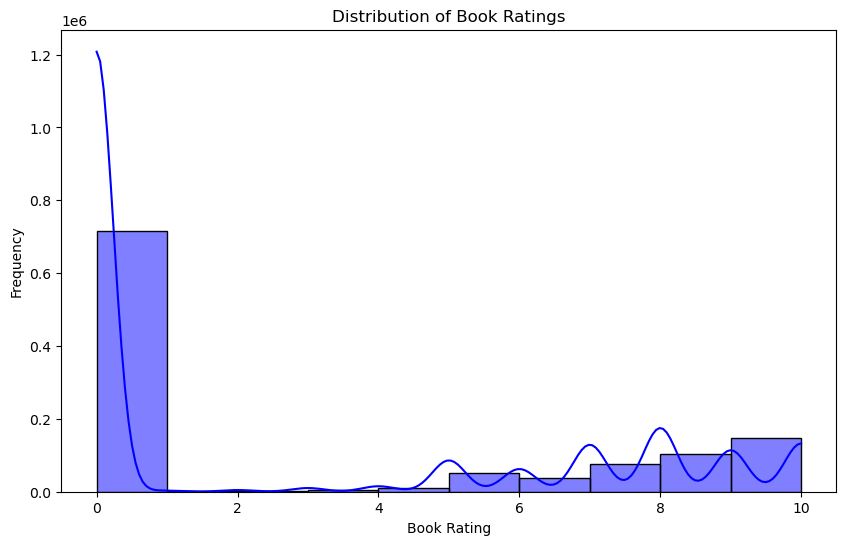

In [60]:
# Plot the distribution of book ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings['Book-Rating'], bins=10, kde=True, color='blue')
plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Frequency')
plt.show()

- The books with ratings between 7 and 10 stars are the most popular. This suggests that a majority of the users found the books to be good or very good.

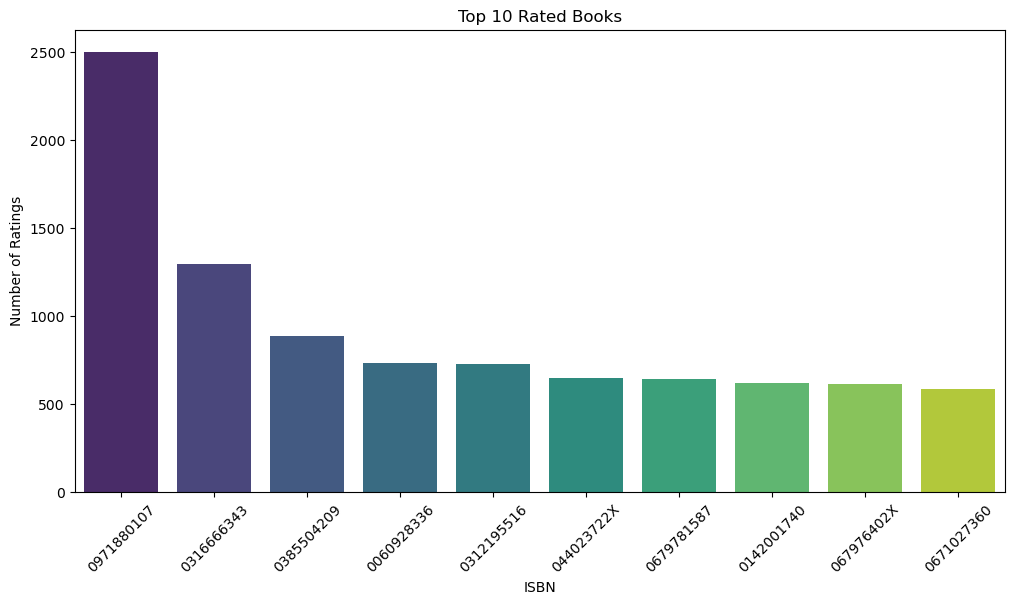

In [61]:
# Count the number of ratings for each book
top_rated_books = ratings['ISBN'].value_counts().head(10)

# Plot the top 10 rated books
plt.figure(figsize=(12, 6))
sns.barplot(x=top_rated_books.index, y=top_rated_books.values, palette='viridis')
plt.title('Top 10 Rated Books')
plt.xlabel('ISBN')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()

- The ISBN number 0971880107 has the most ratings, followed by 0316666343 and 0385504209.

C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


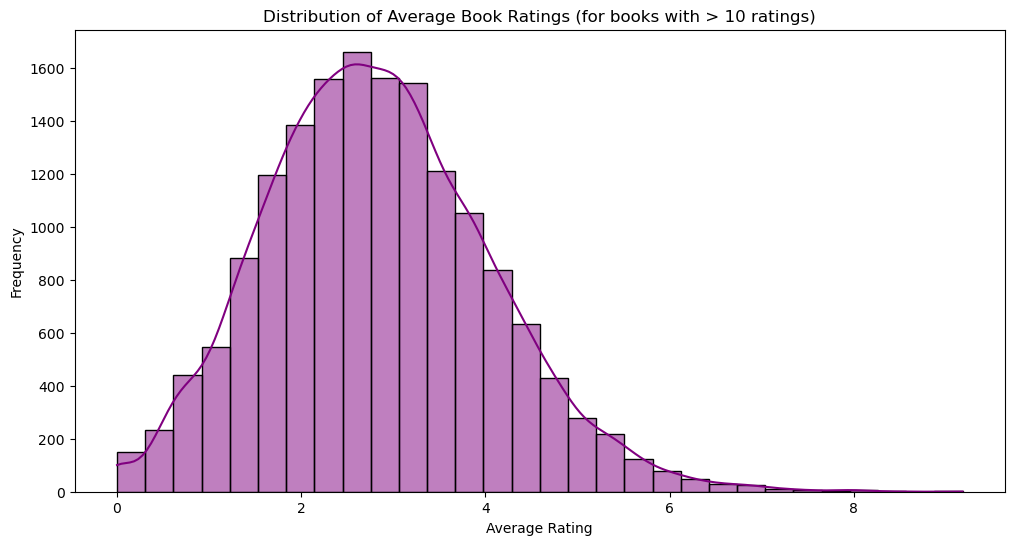

In [62]:
# Calculate the average rating per book
average_rating_per_book = ratings.groupby('ISBN')['Book-Rating'].mean()

# Filter books with a significant number of ratings (e.g., more than 10 ratings)
significant_books = ratings['ISBN'].value_counts()
significant_books = significant_books[significant_books > 10].index
average_rating_per_book = average_rating_per_book[significant_books]

# Plot the average ratings of significant books
plt.figure(figsize=(12, 6))
sns.histplot(average_rating_per_book, bins=30, kde=True, color='purple')
plt.title('Distribution of Average Book Ratings (for books with > 10 ratings)')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

- The books with average ratings between 4 and 4.5 stars are the most popular, with a peak frequency around 4.25 stars. This suggests that a majority of the users rated the books in this range, which is considered to be good or very good.
- The distribution is skewed slightly to the right, meaning there are more ratings on the positive side than on the negative side. This suggests that users tended to rate the books more favorably than poorly.
-  There are still some users who rated books below 3 stars, although these ratings are less frequent than ratings of 4 stars or higher.

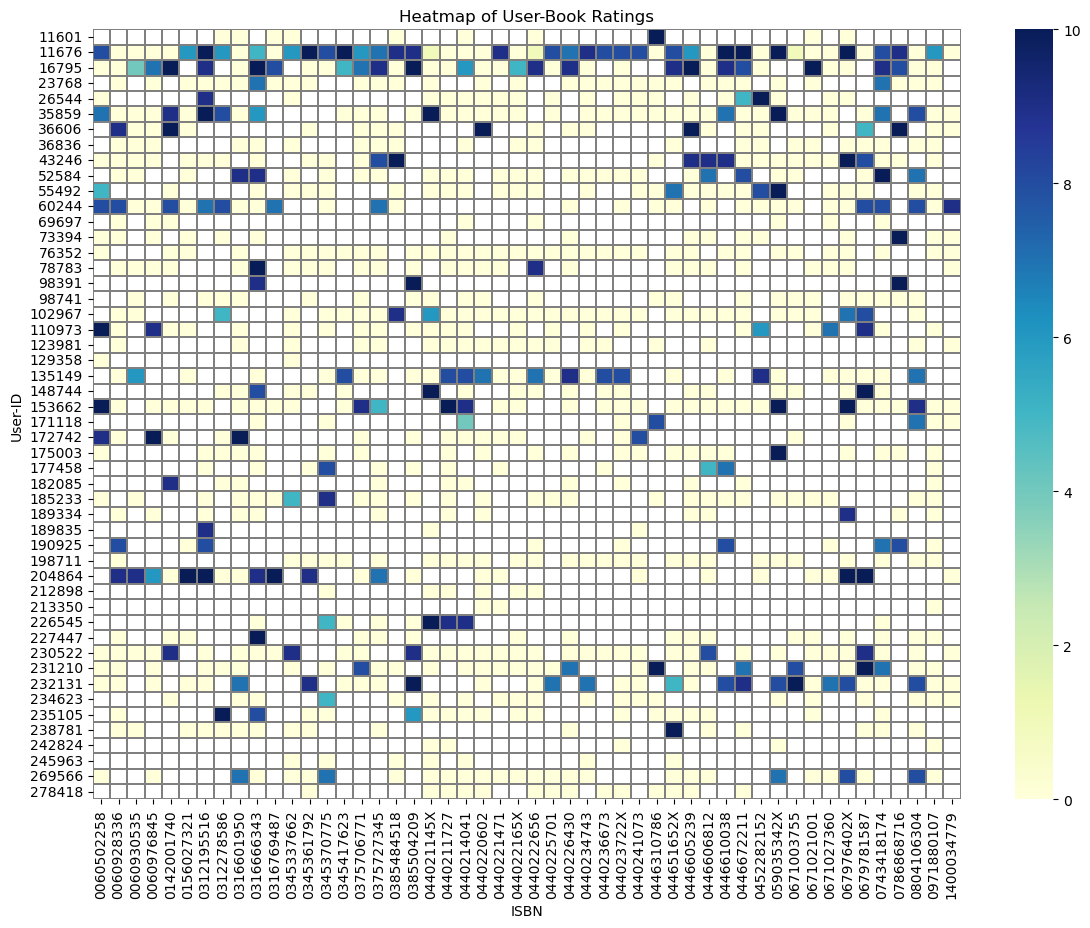

In [63]:
# Sample a subset of users and books for the heatmap
sampled_ratings = ratings[ratings['User-ID'].isin(ratings['User-ID'].value_counts().head(50).index) &
                          ratings['ISBN'].isin(ratings['ISBN'].value_counts().head(50).index)]

# Create a pivot table for the heatmap
pivot_table = sampled_ratings.pivot(index='User-ID', columns='ISBN', values='Book-Rating')

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.1, linecolor='gray')
plt.title('Heatmap of User-Book Ratings')
plt.xlabel('ISBN')
plt.ylabel('User-ID')
plt.show()

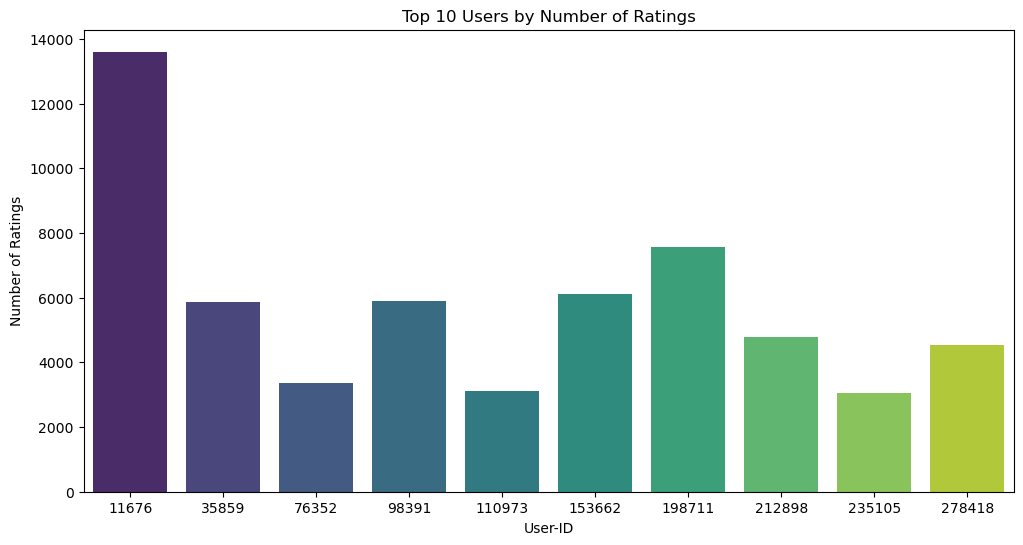

In [64]:
# Get the top 10 users by number of ratings
top_users = ratings['User-ID'].value_counts().head(10)

# Plot the top 10 users
plt.figure(figsize=(12, 6))
sns.barplot(x=top_users.index, y=top_users.values, palette='viridis')
plt.title('Top 10 Users by Number of Ratings')
plt.xlabel('User-ID')
plt.ylabel('Number of Ratings')
plt.show()

- User ID 11676 has rated the most books, followed by users 198711 and 153662.

C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


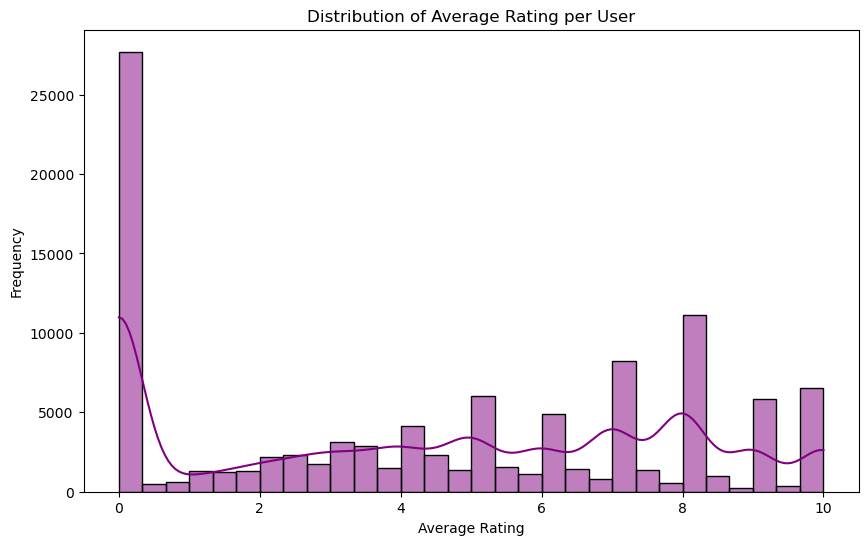

In [65]:
# Calculate the average rating per user
average_rating_per_user = ratings.groupby('User-ID')['Book-Rating'].mean()

# Plot the average rating per user
plt.figure(figsize=(10, 6))
sns.histplot(average_rating_per_user, bins=30, kde=True, color='purple')
plt.title('Distribution of Average Rating per User')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

- Most common average ratings: The most common average ratings are between 4 and 5 stars. This suggests that a majority of users tend to rate users positively.
- Rating distribution: The distribution is skewed slightly to the right, meaning there are more users who give higher average ratings than lower ratings.
- Favorable vs unfavorable ratings: It appears that there are more users who give favorable ratings than unfavorable ratings.
- Range of ratings: The average rating for users ranges from 2 to 5 stars. There are some users who give very low average ratings to other users.

In [66]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [67]:
users.head()

,User-ID,Location,Age,Country,Age Group,Age Missing
0,1,"nyc, new york, usa",36.0,usa,NaN,True
1,2,"stockton, california, usa",18.0,usa,19-25,False
2,3,"moscow, yukon territory, russia",23.0,russia,NaN,True
3,4,"porto, v.n.gaia, portugal",17.0,portugal,13-18,False
4,5,"farnborough, hants, united kingdom",32.0,united kingdom,NaN,True


In [68]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [69]:
df = pd.merge(pd.merge(books, ratings, on='ISBN', how='inner'), users, on='User-ID', how='inner')

In [70]:
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age,Country,Age Group,Age Missing
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0.0,"stockton, california, usa",18.0,usa,19-25,False
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5.0,"timmins, ontario, canada",33.0,canada,NaN,True
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0.0,"timmins, ontario, canada",33.0,canada,NaN,True
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0.0,"timmins, ontario, canada",33.0,canada,NaN,True
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0.0,"timmins, ontario, canada",33.0,canada,NaN,True


In [71]:
# Drop unnecessary columns
df = df.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L','Age Group', 'Age Missing'], axis=1)

In [72]:
df.head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0.0,"stockton, california, usa",18.0,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5.0,"timmins, ontario, canada",33.0,canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0.0,"timmins, ontario, canada",33.0,canada
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0.0,"timmins, ontario, canada",33.0,canada
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0.0,"timmins, ontario, canada",33.0,canada
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,8,0.0,"timmins, ontario, canada",33.0,canada
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,8,0.0,"timmins, ontario, canada",33.0,canada
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,8,0.0,"timmins, ontario, canada",33.0,canada
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,8,0.0,"timmins, ontario, canada",33.0,canada
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,8,5.0,"timmins, ontario, canada",33.0,canada


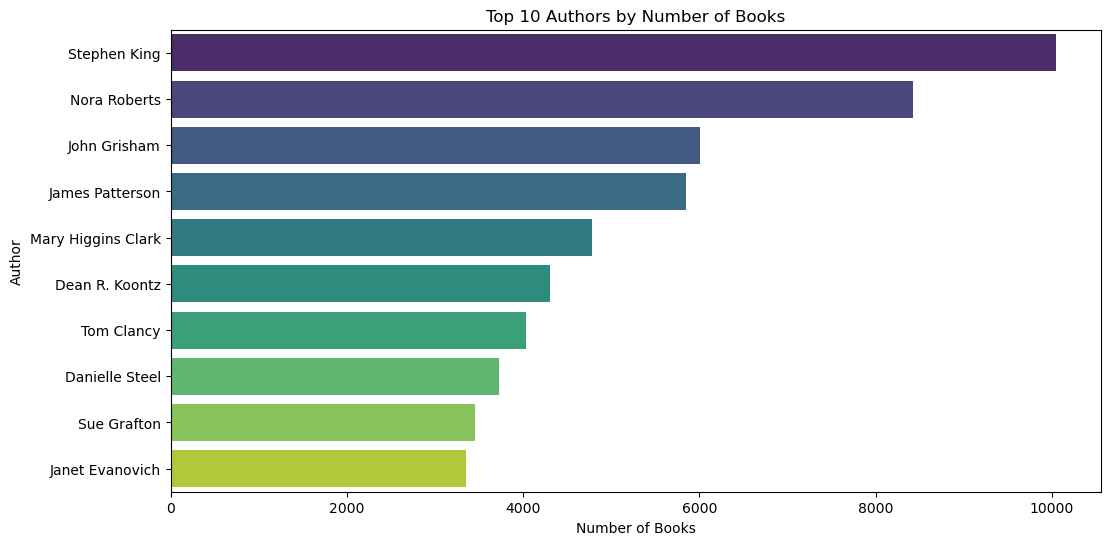

In [73]:
# Top 10 Authors by Number of Books
top_authors = df['Book-Author'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')
plt.title('Top 10 Authors by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()

# Popularity Based Recommender System

- As the name suggests Popularity based recommendation system works with the trend.
- It basically uses the items which are in trend right now.
- For example, if any book which is usually bought by every new user then there are chances that it may suggest that book to the user who just signed up.

- Book weighted avg formula:
Weighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)]

where,
- v is the number of votes for the books;
- m is the minimum votes required to be listed in the chart;
- R is the average rating of the book; and
- C is the mean vote across the whole report.
- Now we find the values of v,m,R,C.

In [74]:
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0.0,"stockton, california, usa",18.0,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5.0,"timmins, ontario, canada",33.0,canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0.0,"timmins, ontario, canada",33.0,canada
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0.0,"timmins, ontario, canada",33.0,canada
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0.0,"timmins, ontario, canada",33.0,canada


In [75]:
# Create column Rating average 
df['Avg_Rating'] = df.groupby('ISBN')['Book-Rating'].transform('mean')
# Create column Rating sum
df['Total_No_Of_Users_Rated']=df.groupby('ISBN')['Book-Rating'].transform('count')

In [76]:
C = df['Avg_Rating'].mean()
m = df['Total_No_Of_Users_Rated'].quantile(0.90)
Top_Books = df.loc[df['Total_No_Of_Users_Rated'] >= m]
print(f'C={C} , m={m}')
Top_Books.shape

C=2.838885014582803 , m=136.0


(103560, 12)

- Here we used 90th percentile as our cutoff. In other words, for a book to feature in the charts, it must have more votes than at least 90% of the books in the list.
- We see that there are 38570 books which qualify to be in this list. Now, we need to calculate our metric for each qualified book.
- To do this, we will define a function, weighted_rating() and define a new feature score, of which we’ll calculate the value by applying this function to our DataFrame of qualified books:

In [77]:
def weighted_rating(x, m=m, C=C):
    v = x['Total_No_Of_Users_Rated']
    R = x['Avg_Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)
    
 
Top_Books['Score'] = Top_Books.apply(weighted_rating,axis=1)
 
 
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

C:\Users\vijay\AppData\Local\Temp\ipykernel_2828\2087611483.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_Books['Score'] = Top_Books.apply(weighted_rating,axis=1)


In [78]:
#Keeping only one entry of each book
Top_Books=Top_Books.sort_values('Score', ascending=False).drop_duplicates('ISBN').sort_index()
cm=sns.light_palette('yellow',as_cmap=True)
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

#Printing the top 20 books
Top_Books[['Book-Title', 'Total_No_Of_Users_Rated', 'Avg_Rating', 'Score']].reset_index(drop=True).head(20).style.background_gradient(cmap=cm)

,Book-Title,Total_No_Of_Users_Rated,Avg_Rating,Score
0,Harry Potter and the Goblet of Fire (Book 4),194,6.541237,5.015419
1,Harry Potter and the Prisoner of Azkaban (Book 3),197,6.467005,4.985250
2,Harry Potter and the Chamber of Secrets (Book 2),170,6.611765,4.934929
3,Harry Potter and the Sorcerer's Stone (Book 1),168,6.363095,4.786475
4,Harry Potter and the Order of the Phoenix (Book 5),334,5.571856,4.781039
5,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),571,4.900175,4.503661
6,The Da Vinci Code,883,4.652322,4.410293
7,Harry Potter and the Prisoner of Azkaban (Book 3),226,5.345133,4.403559
8,To Kill a Mockingbird,389,4.920308,4.381121
9,The Lovely Bones: A Novel,1295,4.468726,4.313828


- The Popularity based recommender provide a general chart of recommended books to all the users. They are not sensitive to the interests and tastes of a particular user.

# Collaborative Filtering Based Recommender System

- Collaborative filtering is a technique used by websites like Amazon, YouTube, and Netflix. 
- It filters out items that a user might like on the basis of reactions of similar users. 
- There are two categories of collaborative filtering algorithms: memory based and model based.
- Model based approach involves building machine learning algorithms to predict user's ratings. 
- They involve dimensionality reduction methods that reduce high dimensional matrix containing abundant number of missing values with a much smaller matrix in lower-dimensional space.
- The goal of this section is to compare SVD and NMF algorithms, try different configurations of parameters and explore obtained results.

In [79]:
import scipy
import math
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

In [80]:
# Select user IDs with more than 200 book ratings
min_ratings_threshold = 200

# Count book ratings per user
num_ratings_per_user = df.groupby('User-ID')['Book-Rating'].count()

# Filter users with more than the minimum threshold
knowledgeable_user_ids = num_ratings_per_user[num_ratings_per_user > min_ratings_threshold].index

In [81]:
# Filter ratings from knowledgeable users
knowledgeable_user_ratings = df[df['User-ID'].isin(knowledgeable_user_ids)]

In [82]:
min_ratings_count_threshold=50
rating_counts= knowledgeable_user_ratings.groupby('Book-Title').count()['Book-Rating']
popular_books = rating_counts[rating_counts >= min_ratings_count_threshold].index

In [83]:
final_ratings =  knowledgeable_user_ratings[knowledgeable_user_ratings['Book-Title'].isin(popular_books)]

In [84]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID'
                          ,values='Book-Rating')
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [85]:
pt.fillna(0,inplace=True)
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In the context of a recommender system:

We can use this matrix to recommend items to users based on their similarity to other users who have rated those books highly. For example, you can find the user with the highest cosine similarity to a particular user and recommend the items that the similar user rated highly.

In [86]:
from sklearn.metrics.pairwise import cosine_similarity 

In [87]:
similarity_score = cosine_similarity(pt)

In [88]:
def recommend(book_name):
    index = np.where(pt.index==book_name)[0][0]
    similar_books = sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1], reverse=True)[1:6]
    
    data = []
    
    for i in similar_books:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    return data

In [89]:
recommend("A Walk to Remember")

[['The Rescue',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446610399.01.MZZZZZZZ.jpg'],
 ['Nights in Rodanthe',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446531332.01.MZZZZZZZ.jpg'],
 ['The Notebook',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446605239.01.MZZZZZZZ.jpg'],
 ['Granny Dan',
  'DANIELLE STEEL',
  'http://images.amazon.com/images/P/0440224829.01.MZZZZZZZ.jpg'],
 ['A Bend in the Road',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446527785.01.MZZZZZZZ.jpg']]

In [90]:
recommend("Prodigal Summer")

[['Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
  'ROBERT PIRSIG',
  'http://images.amazon.com/images/P/0553277472.01.MZZZZZZZ.jpg'],
 ['The Poisonwood Bible',
  'Barbara Kingsolver',
  'http://images.amazon.com/images/P/0060175400.01.MZZZZZZZ.jpg'],
 ['Love in the Time of Cholera (Penguin Great Books of the 20th Century)',
  'Gabriel Garcia Marquez',
  'http://images.amazon.com/images/P/0140119906.01.MZZZZZZZ.jpg'],
 ["The Bonesetter's Daughter",
  'Amy Tan',
  'http://images.amazon.com/images/P/0399146431.01.MZZZZZZZ.jpg'],
 ['The Fourth Hand',
  'John Irving',
  'http://images.amazon.com/images/P/0345449347.01.MZZZZZZZ.jpg']]

In [91]:
recommend("1984")

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg']]

In [92]:
recommend("Harry Potter and the Goblet of Fire (Book 4)")

[['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Chamber of Secrets (Book 2)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439064872.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Order of the Phoenix (Book 5)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/043935806X.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg']]

In [93]:
!pip install scikit-surprise

In [94]:
from surprise import Dataset, Reader, SVD

In [95]:
from surprise.model_selection import train_test_split
from surprise import accuracy

# Define the rating scale
reader = Reader(rating_scale=(0, 10))

# Load the data into Surprise's dataset format
data = Dataset.load_from_df(df[['User-ID', 'Book-Title', 'Book-Rating']], reader)

# Split the dataset into training and testing sets
train_set, test_set = train_test_split(data, test_size=0.20, random_state=42)

# Define the SVD algorithm
model = SVD()

# Train the algorithm on the training set
model.fit(train_set)

# Make predictions on the test set
predictions = model.test(test_set)

# Evaluate the model
accuracy.rmse(predictions)

RMSE: 3.5225


3.5224912203553145

In [96]:
def recommend_books(user_id, n=10):
    # List all unique book titles
    all_books = df['Book-Title'].unique()

    # Remove books already rated by the user
    rated_books = df[df['User-ID'] == user_id]['Book-Title'].values
    books_to_predict = [book for book in all_books if book not in rated_books]

    # Predict ratings for remaining books
    predictions = []
    for book in books_to_predict:
        pred = model.predict(user_id, book)
        predictions.append((book, pred.est))

    # Sort predictions by estimated rating
    predictions.sort(key=lambda x: x[1], reverse=True)

    # Get top N recommendations
    top_n = predictions[:n]

    return top_n

In [97]:
user_id = 271705
recommended_books = recommend_books(user_id)
print(f"Top 10 recommended books for user {user_id}:")
for i, (title, _) in enumerate(recommended_books, start=1):
    print(f"{i}. {title}")

Top 10 recommended books for user 271705:
1. Midnight in the Garden of Good and Evil: A Savannah Story
2. Big Trouble
3. Memoirs of a Geisha Uk
4. Montana Sky
5. Three Fates
6. Four To Score (A Stephanie Plum Novel)
7. High Five (A Stephanie Plum Novel)
8. A Child Called \It\": One Child's Courage to Survive"
9. Kushiel's Dart
10. The Tipping Point: How Little Things Can Make a Big Difference


In [98]:
import pickle

In [99]:
# Save the trained model to a pickle file
with open('svd_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("Model trained and saved as svd_model.pkl")

Model trained and saved as svd_model.pkl
